In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_style("whitegrid")

In [107]:
df = pd.read_csv('fraud_oracle.csv')

In [68]:
df.shape

(15420, 33)

In [69]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [70]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [71]:
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


so we have 15420 data , 32 features and 1 target FraudFound_P

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [73]:
print('DayOfWeekClaimed',df['DayOfWeekClaimed'].unique())
print('MonthClaimed',df['MonthClaimed'].unique())
print('MonthClaimed',df['NumberOfSuppliments'].unique())
print('MonthClaimed',df['AgeOfPolicyHolder'].unique())
print('MonthClaimed',df['BasePolicy'].unique())
print('MonthClaimed',df['Days_Policy_Accident'].unique())

DayOfWeekClaimed ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
MonthClaimed ['none' 'more than 5' '3 to 5' '1 to 2']
MonthClaimed ['26 to 30' '31 to 35' '41 to 50' '51 to 65' '21 to 25' '36 to 40'
 '16 to 17' 'over 65' '18 to 20']
MonthClaimed ['Liability' 'Collision' 'All Perils']
MonthClaimed ['more than 30' '15 to 30' 'none' '1 to 7' '8 to 15']


In [108]:
df = df.loc[df['DayOfWeekClaimed']!='0']
df = df.loc[df['MonthClaimed']!='0']

In [78]:
df.shape

(15419, 33)

In [10]:
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

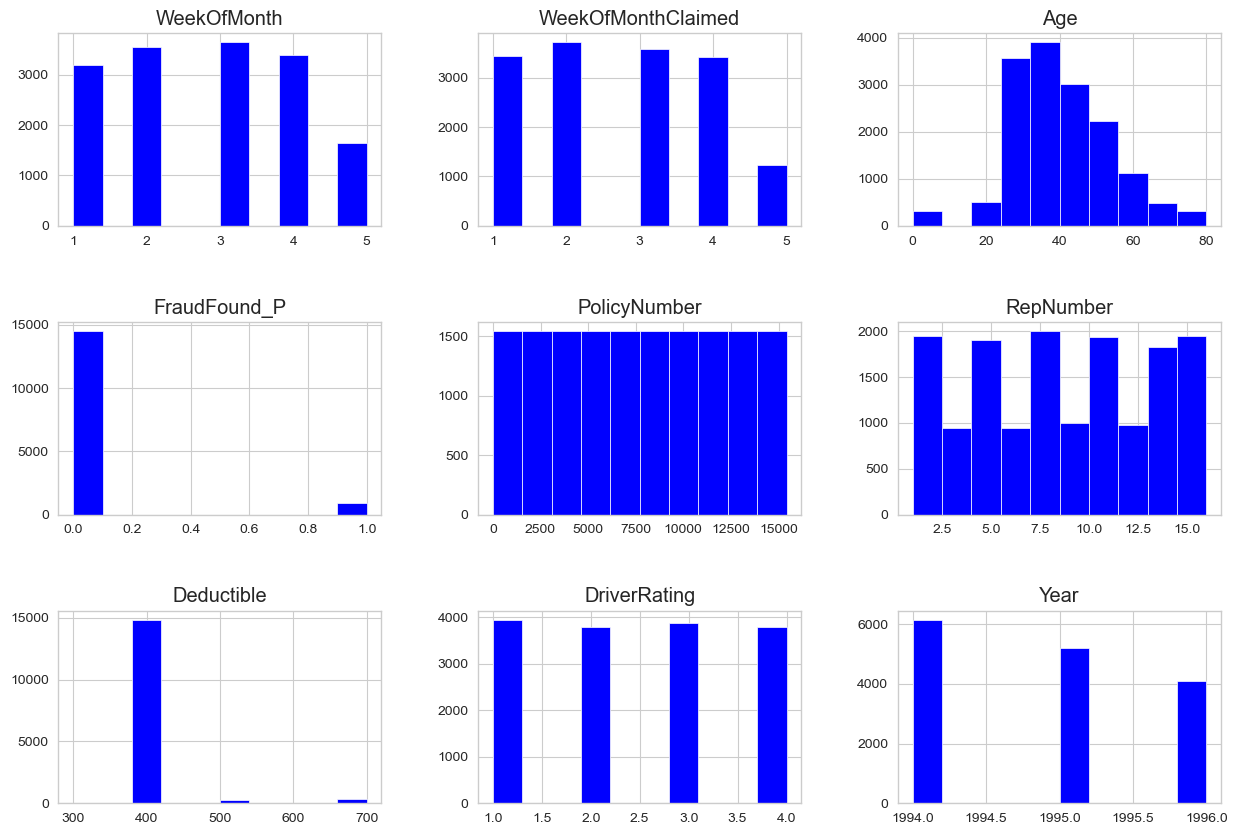

In [11]:
df.hist(figsize=(15,10), color = 'blue')
plt.subplots_adjust(hspace=0.5);

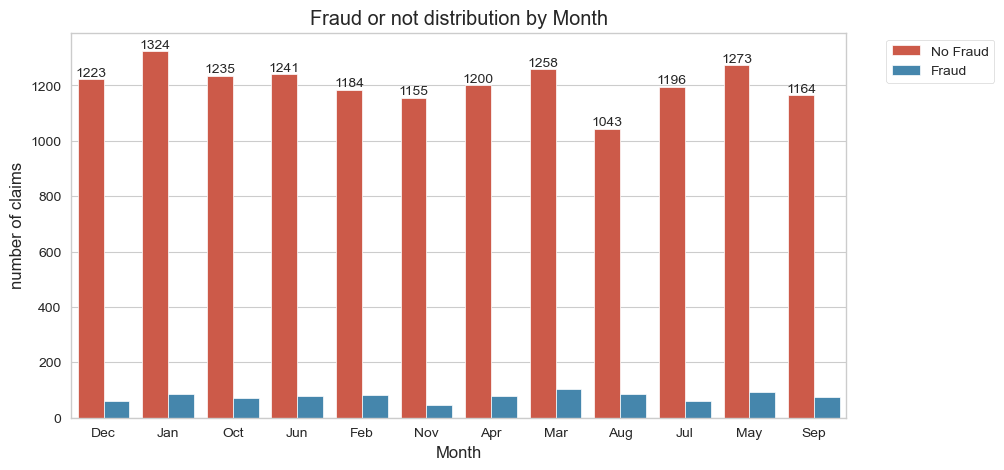

In [12]:
plt.figure(figsize=(10, 5))
labels = ['No Fraud', 'Fraud']
fig = sns.countplot(x="Month", hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0]);
plt.legend(labels,  bbox_to_anchor=(1.2, 1))
plt.title('Fraud or not distribution by Month')

plt.ylabel('number of claims')
plt.show()

In [83]:
months = df['Month'].unique()
fraud_ratio = []
for month in months:
    total_count = len(df[df['Month'] == month])
    fraud_count = len(df[(df['Month'] == month) & (df['FraudFound_P'] == 1)])
    ratio = fraud_count / total_count
    fraud_ratio.append(ratio)
    print(month, ratio)


Dec 0.04824902723735409
Jan 0.06165839829907867
Oct 0.05363984674329502
Jun 0.06056018168054504
Feb 0.06477093206951026
Nov 0.038301415487094086
Apr 0.0625
Mar 0.075
Aug 0.07453416149068323
Jul 0.04777070063694268
May 0.06876371616678859
Sep 0.06129032258064516


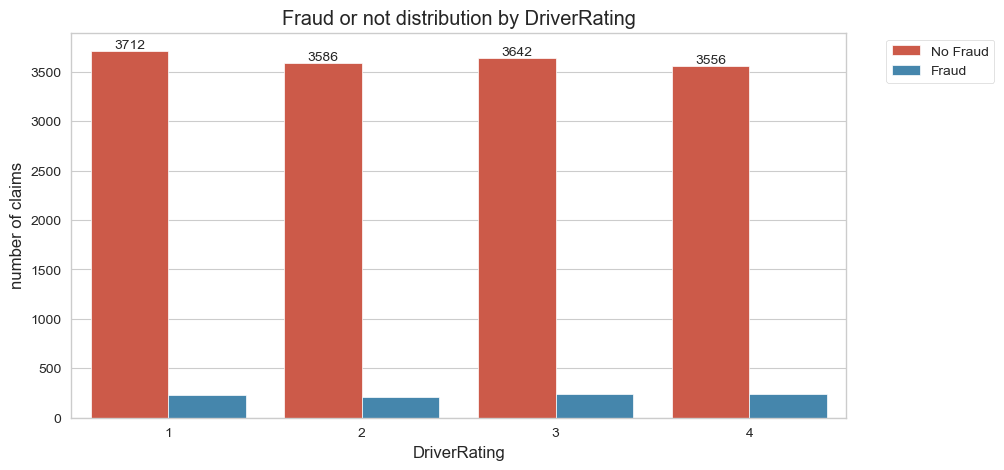

In [13]:
plt.figure(figsize=(10, 5))
labels = ['No Fraud', 'Fraud']
fig = sns.countplot(x="DriverRating", hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0]);
plt.legend(labels,  bbox_to_anchor=(1.2, 1))
plt.title('Fraud or not distribution by DriverRating')

plt.ylabel('number of claims')
plt.show()

In [84]:
ratings = df['DriverRating'].unique()
fraud_ratio = []
for rating in ratings:
    total_count = len(df[df['DriverRating'] == rating])
    fraud_count = len(df[(df['DriverRating'] == rating) & (df['FraudFound_P'] == 1)])
    ratio = fraud_count / total_count
    fraud_ratio.append(ratio)
    print(rating, ratio)

1 0.058823529411764705
4 0.06198892112898971
3 0.06230690010298661
2 0.05631578947368421


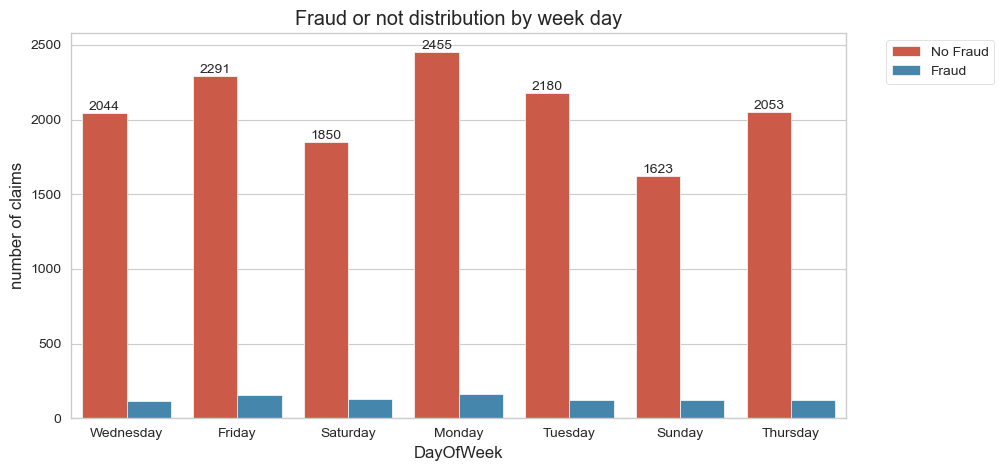

In [14]:
plt.figure(figsize=(10, 5))
fig = sns.countplot(x="DayOfWeek", hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0]);
plt.legend(labels, bbox_to_anchor=(1.2, 1))
plt.title('Fraud or not distribution by week day')

plt.ylabel('number of claims')
plt.show()

In [87]:
days = df['DayOfWeek'].unique()
fraud_ratio = []
for day in days:
    total_count = len(df[df['DayOfWeek'] == day])
    fraud_count = len(df[(df['DayOfWeek'] == day) & (df['FraudFound_P'] == 1)])
    ratio = fraud_count / total_count
    fraud_ratio.append(ratio)
    print(day, ratio)

Wednesday 0.053265400648448355
Friday 0.06298568507157465
Saturday 0.06659939455095863
Monday 0.06118546845124283
Tuesday 0.05217391304347826
Sunday 0.06991404011461318
Thursday 0.05522319374137138


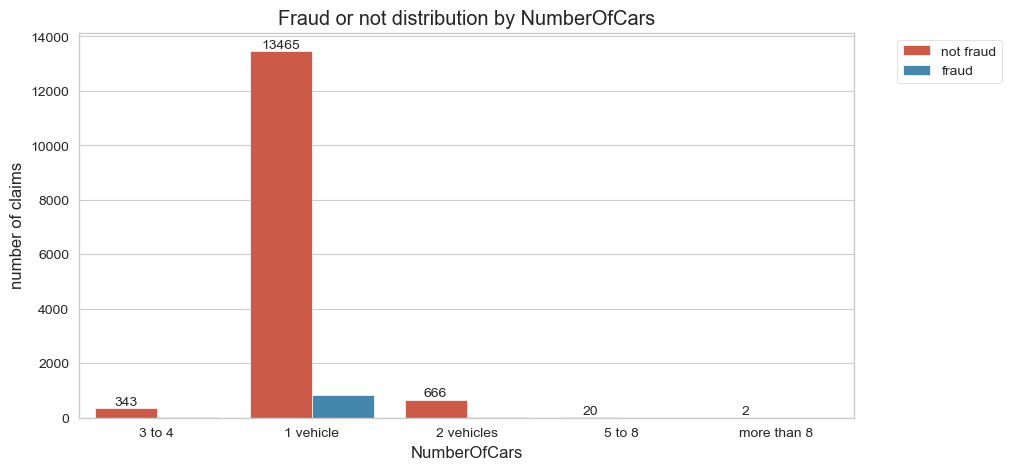

In [15]:
df.groupby(['NumberOfCars','FraudFound_P']).size().reset_index().rename(columns={0:'Num of claims'})
plt.figure(figsize=(10, 5))
fig = sns.countplot(x="NumberOfCars", hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0]);
plt.legend(['not fraud', 'fraud'], bbox_to_anchor=(1.2, 1))
plt.title('Fraud or not distribution by NumberOfCars')

plt.ylabel('number of claims')
plt.show()

In [88]:
nums = df['NumberOfCars'].unique()
for num in nums:
    total_count = len(df[df['NumberOfCars'] == num])
    fraud_count = len(df[(df['NumberOfCars'] == num) & (df['FraudFound_P'] == 1)])
    ratio = fraud_count / total_count
    print(num, ratio)

3 to 4 0.07795698924731183
1 vehicle 0.059378274537198746
2 vehicles 0.06064880112834979
5 to 8 0.047619047619047616
more than 8 0.0


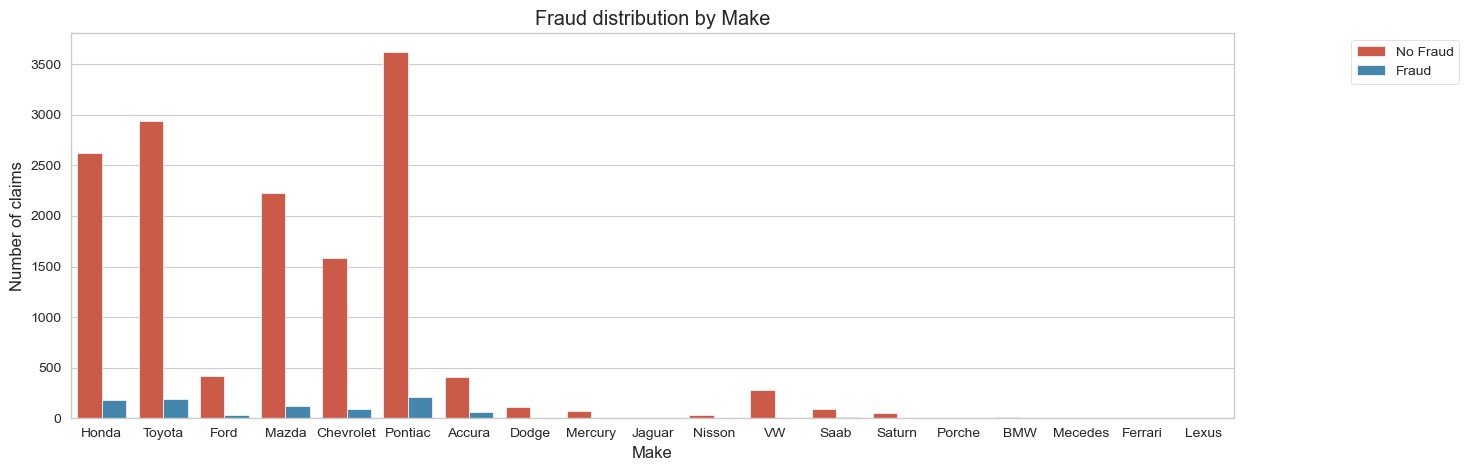

In [16]:
plt.figure(figsize=(15, 5))
sns.countplot(x="Make" , hue = 'FraudFound_P', data= df)
plt.legend(labels, bbox_to_anchor=(1.2, 1))
plt.title('Fraud distribution by Make')
plt.xlabel('Make')
plt.ylabel('Number of claims')
plt.show()

In [89]:
nums = df['Make'].unique()
for num in nums:
    total_count = len(df[df['Make'] == num])
    fraud_count = len(df[(df['Make'] == num) & (df['FraudFound_P'] == 1)])
    ratio = fraud_count / total_count
    print(num, ratio)

Honda 0.06392857142857143
Toyota 0.059596283242550466
Ford 0.07333333333333333
Mazda 0.052251486830926085
Chevrolet 0.05591909577632362
Pontiac 0.05551211884284597
Accura 0.125
Dodge 0.01834862385321101
Mercury 0.07228915662650602
Jaguar 0.0
Nisson 0.03333333333333333
VW 0.028268551236749116
Saab 0.10185185185185185
Saturn 0.10344827586206896
Porche 0.0
BMW 0.06666666666666667
Mecedes 0.25
Ferrari 0.0
Lexus 0.0


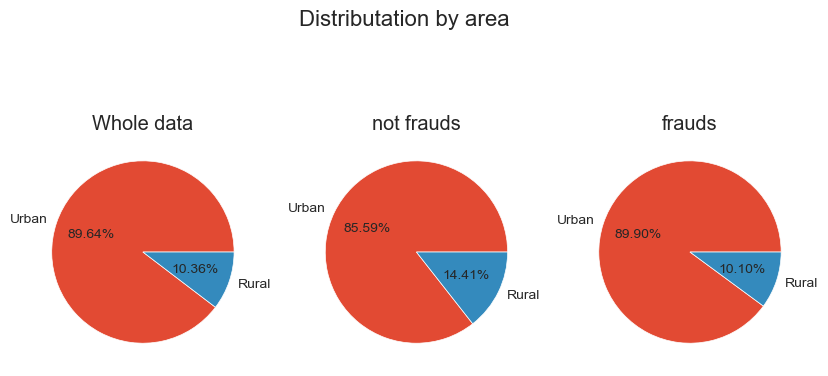

In [17]:
df_fraud1 = df.loc[df['FraudFound_P'] == 1]
df_no_fraud = df.loc[df['FraudFound_P'] == 0]
Accident_area_1 = df.AccidentArea.value_counts().values
Accident_area_2 = df_fraud1.AccidentArea.value_counts().values
Accident_area_3 = df_no_fraud.AccidentArea.value_counts().values
labels = ['Urban','Rural']

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].pie(Accident_area_1, labels = labels, autopct = '%1.2f%%')
ax[0].set_title('Whole data')

ax[1].pie(Accident_area_2, labels = labels, autopct = '%1.2f%%')
ax[1].set_title('not frauds')

ax[2].pie(Accident_area_3, labels = labels, autopct = '%1.2f%%')
ax[2].set_title('frauds')

fig.suptitle('Distributation by area', fontsize=16)
plt.show()


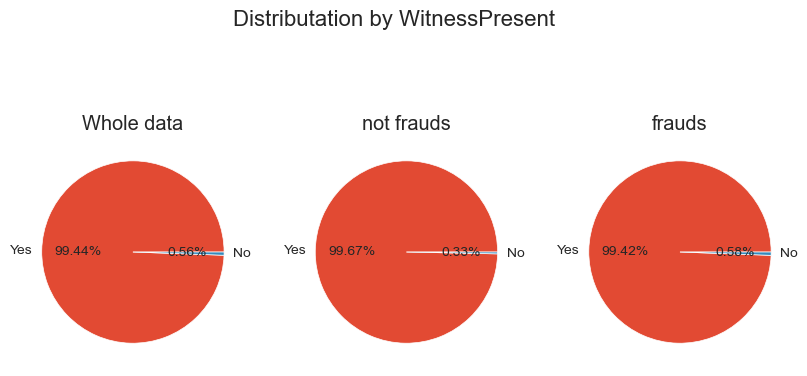

In [18]:
df_fraud1 = df.loc[df['FraudFound_P'] == 1]
df_no_fraud = df.loc[df['FraudFound_P'] == 0]
Accident_area_1 = df.WitnessPresent.value_counts().values
Accident_area_2 = df_fraud1.WitnessPresent.value_counts().values
Accident_area_3 = df_no_fraud.WitnessPresent.value_counts().values
labels = ['Yes','No']

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].pie(Accident_area_1, labels = labels, autopct = '%1.2f%%')
ax[0].set_title('Whole data')

ax[1].pie(Accident_area_2, labels = labels, autopct = '%1.2f%%')
ax[1].set_title('not frauds')

ax[2].pie(Accident_area_3, labels = labels, autopct = '%1.2f%%')
ax[2].set_title('frauds')

fig.suptitle('Distributation by WitnessPresent', fontsize=16)
plt.show()

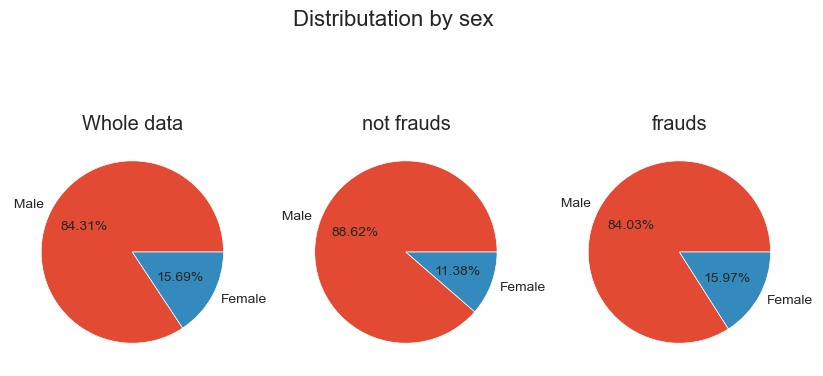

In [19]:
df_fraud1 = df.loc[df['FraudFound_P'] == 1]
df_no_fraud = df.loc[df['FraudFound_P'] == 0]
area_1 = df.Sex.value_counts().values
area_2 = df_fraud1.Sex.value_counts().values
area_3 = df_no_fraud.Sex.value_counts().values
labels = [' Male','Female']

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].pie(area_1, labels = labels, autopct = '%1.2f%%')
ax[0].set_title('Whole data')

ax[1].pie(area_2, labels = labels, autopct = '%1.2f%%')
ax[1].set_title('not frauds')

ax[2].pie(area_3, labels = labels, autopct = '%1.2f%%')
ax[2].set_title('frauds')

fig.suptitle('Distributation by sex', fontsize=16)
plt.show()


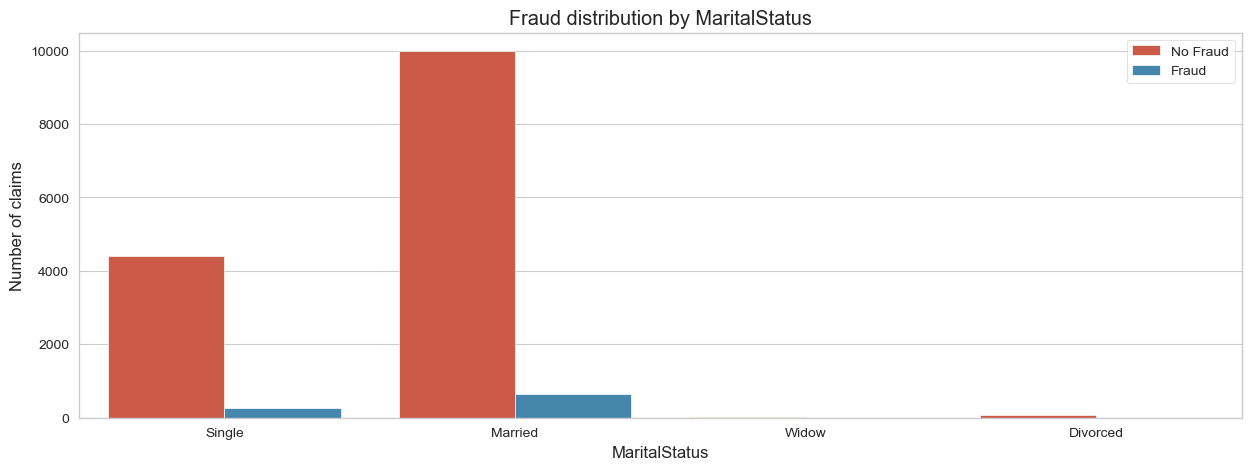

In [20]:
plt.figure(figsize=(15, 5))
sns.countplot(x="MaritalStatus" , hue = 'FraudFound_P', data= df)
plt.legend(["No Fraud", "Fraud"])
plt.title('Fraud distribution by MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Number of claims')
plt.show()

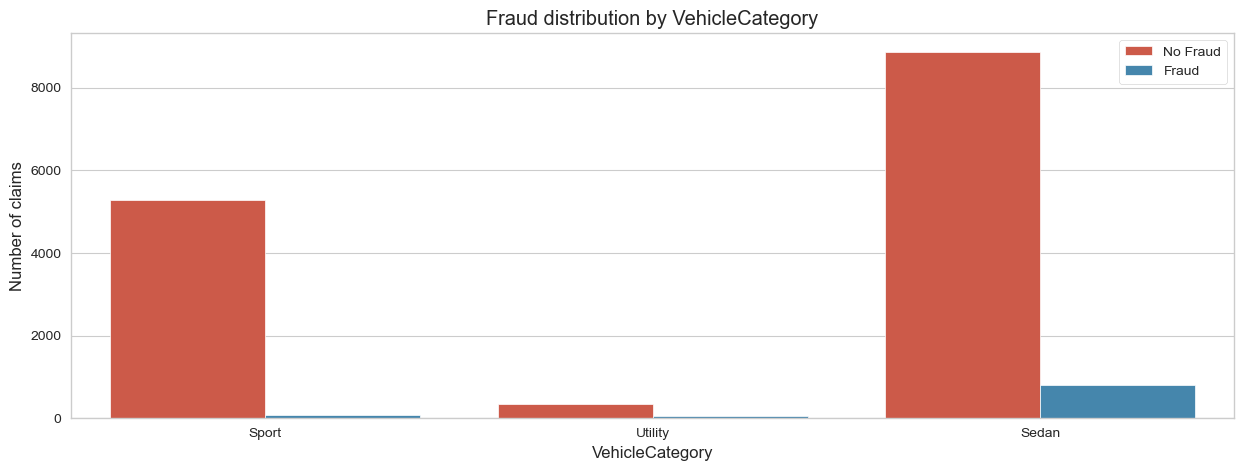

In [21]:
plt.figure(figsize=(15, 5))
sns.countplot(x="VehicleCategory" , hue = 'FraudFound_P', data= df)
plt.legend(["No Fraud", "Fraud"])
plt.title('Fraud distribution by VehicleCategory')
plt.xlabel('VehicleCategory')
plt.ylabel('Number of claims')
plt.show()

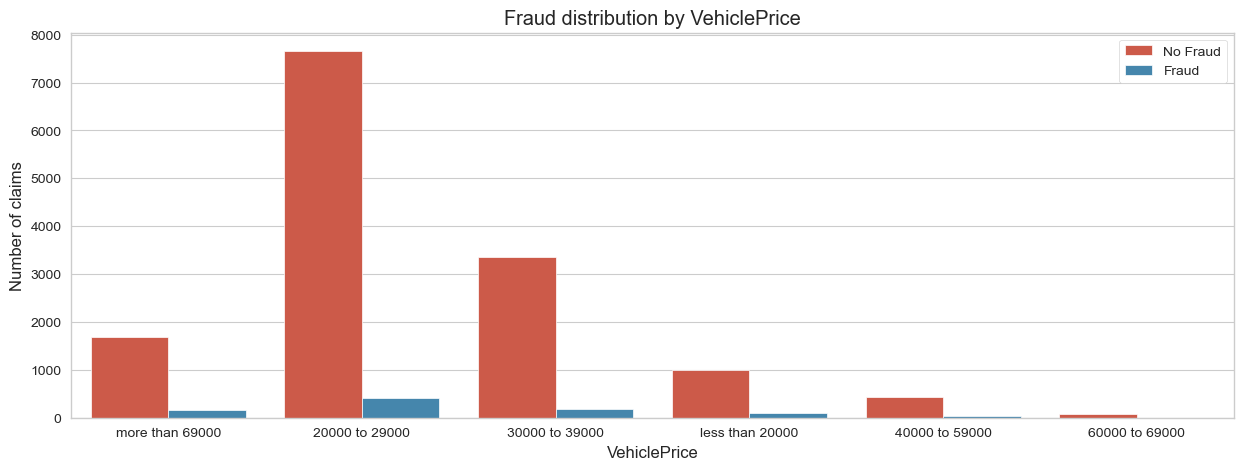

In [25]:
plt.figure(figsize=(15, 5))
sns.countplot(x="VehiclePrice" , hue = 'FraudFound_P', data= df)
plt.legend(["No Fraud", "Fraud"])
plt.title('Fraud distribution by VehiclePrice')
plt.xlabel('VehiclePrice')
plt.ylabel('Number of claims')
plt.show()

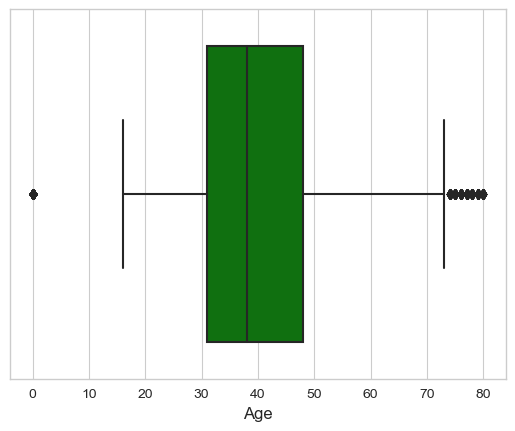

In [22]:
sns.boxplot(x = 'Age', data = df, color = 'green')
plt.show()

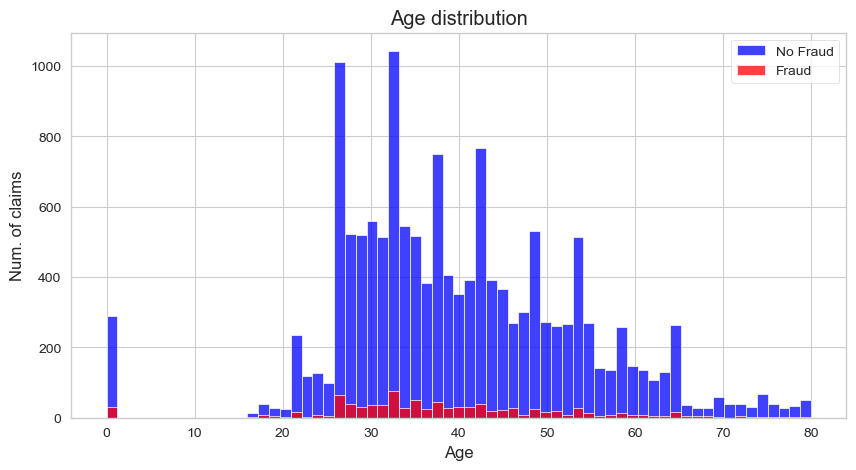

In [23]:
df_fraud1 = df.loc[df['FraudFound_P'] == 1]
df_no_fraud = df.loc[df['FraudFound_P'] == 0]
plt.figure(figsize=(10,5))
sns.histplot(data = df_no_fraud, x = 'Age', color = 'blue', bins = 65)
sns.histplot(data = df_fraud1, x = 'Age', color = 'red', bins = 65)
plt.title('Age distribution')
plt.legend(["No Fraud", "Fraud"])
plt.ylabel("Num. of claims")
plt.show()

In [109]:
df = df[df['Age']>15]

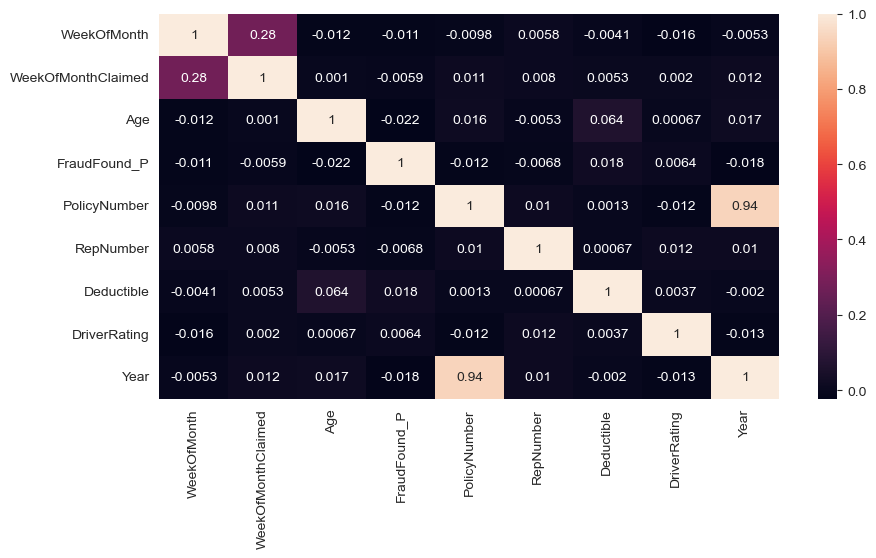

In [26]:
plt.figure(figsize=(10,5))
dataplot = sns.heatmap(df.corr(), annot=True)
plt.show()

# Encoding Data

In [27]:
object_cols = df.select_dtypes(include=['object']).columns
print(object_cols)

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')


now we have to encode these columns to get numeric values

In [110]:
# month encoding
df[['Month']] = df[['Month']].replace( {
    'Jan' : 0,
    'Feb' : 1,
    'Mar' :2,
    'Apr' : 3,
    'May': 4, 
    'Jun': 5,
    'Jul': 6,
    'Aug' : 7,
    'Sep': 8,
    'Oct' : 9,
    'Nov' : 10,
    'Dec' : 11
    })

In [111]:
# day of week encoding
df[['DayOfWeek']] = df[['DayOfWeek']].replace( {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4, 
    'Saturday': 5,
    'Sunday' : 6
    })

In [112]:
# Make encoding
df[['Make']] = df[['Make']].replace( {
    'Lexus': 0,
    'Ferrari': 1, 
    'Mecedes': 2,
    'Porche': 3,
    'Jaguar': 4,
    'BMW': 5,            
    'Nisson': 6,
    'Saturn': 7,
    'Mercury':8,
    'Dodge' : 9,
    'Saab' : 10,
    'VW' : 11,
    'Ford': 12,
    'Accura': 13,
    'Chevrolet': 14,
    'Mazda' : 15,
    'Honda' : 16,
    'Toyota' : 17,
    'Pontiac': 18
    })  

In [113]:
# accident area encoding
df[['AccidentArea']] = df[['AccidentArea']].replace( {
    'Rural' : 0,
    'Urban' : 1
    })

In [114]:
# DayOfWeekClaimed encoding
df[['DayOfWeekClaimed']] = df[['DayOfWeekClaimed']].replace( {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4, 
    'Saturday': 5,
    'Sunday' : 6
    })

In [115]:
# MonthClaimed encoding
df[['MonthClaimed']] = df[['MonthClaimed']].replace( {
    'Jan' : 0,
    'Feb' : 1,
    'Mar' :2,
    'Apr' : 3,
    'May': 4, 
    'Jun': 5,
    'Jul': 6,
    'Aug' : 7,
    'Sep': 8,
    'Oct' : 9,
    'Nov' : 10,
    'Dec' : 11
    })


In [116]:
# sex encoding
df[['Sex']] = df[['Sex']].replace( {
    'Female' : 0,
    'Male' : 1
    })

In [117]:
# marital status encoding
df[['MaritalStatus']] = df[['MaritalStatus']].replace( {
    'Widow' : 0,
    'Divorced' : 1,
    'Single' : 2,    
    'Married' : 3
    })

In [118]:
# Fault encoding
df[['Fault']] = df[['Fault']].replace( {
    'Third Party' : 0,
    'Policy Holder' : 1
    })

In [119]:
# policy type encoding
df[['PolicyType']] = df[['PolicyType']].replace( {
    'Sport - Liability' : 0,
    'Sport - All Perils' : 1,
    'Utility - Liability' : 2,
    'Utility - Collision' :3,
    'Utility - All Perils' :4,
    'Sport - Collision' : 5,
    'Sedan - All Perils' : 6 ,
    'Sedan - Liability' : 7,
    'Sedan - Collision' : 8
    })


In [120]:
# vehicle category encoding
df[['VehicleCategory']] = df[['VehicleCategory']].replace( {
    'Utility' : 0,
    'Sport' : 1, 
    'Sedan' : 2
    })

In [121]:
# vehicle price encoding
df[['VehiclePrice']] = df[['VehiclePrice']].replace( {
    'less than 20000' : 0,
    '20000 to 29000': 1,
    '30000 to 39000': 2,
    '40000 to 59000': 3,
    '60000 to 69000' : 4,
    'more than 69000' : 5
    })  

In [122]:
# Days_Policy_Accident encoding
df[['Days_Policy_Accident']] = df[['Days_Policy_Accident']].replace( {
    'none' : 0,
    '1 to 7' : 1,
    '8 to 15' : 2,
    '15 to 30' :3,
    'more than 30' :4
    })

In [123]:
# Days_Policy_claim encoding
df[['Days_Policy_Claim']] = df[['Days_Policy_Claim']].replace( {
    '8 to 15' : 0,
    '15 to 30' : 1,
    'more than 30' : 2
    })

In [124]:
# PastNumberOfClaims encoding
df[['PastNumberOfClaims']] = df[['PastNumberOfClaims']].replace( {
    'none': 0,
    '1': 1,
    '2 to 4': 2,
    'more than 4': 3
    })

In [125]:
# age of vehicle encoding
df[['AgeOfVehicle']] = df[['AgeOfVehicle']].replace({
    'new' : 0,
    '2 years' : 1,
    '3 years' : 2,
    '4 years' : 3,
    '5 years' : 4, 
    '6 years' : 5,
    '7 years' : 6,      
    'more than 7' : 7
    })

In [126]:
# age of policy holder encoding
df[['AgeOfPolicyHolder']] = df[['AgeOfPolicyHolder']].replace({
    '18 to 20' : 0,  
    '21 to 25' : 1,
    '26 to 30' : 2,
    '31 to 35' : 3,
    '36 to 40' : 4,
    '41 to 50' : 5,
    '51 to 65' : 6, 
    'over 65' : 7
    })

In [127]:
# PoliceReportFiled encoding
df[['PoliceReportFiled']] = df[['PoliceReportFiled']].replace({
    'Yes' : 0,
    'No' : 1
    })

In [128]:
# witness present encoding
df[['WitnessPresent']] = df[['WitnessPresent']].replace({
    'Yes' : 0,
    'No' : 1
    })

In [129]:
# agent type encoding
df[['AgentType']] = df[['AgentType']].replace({
    'Internal' : 0,
    'External' : 1
    })

In [130]:
# NumberOfSuppliments encoding
df[['NumberOfSuppliments']] = df[['NumberOfSuppliments']].replace({
    'none' : 0,
    '1 to 2' : 1,
    '3 to 5' : 2,
    'more than 5' : 3
    })

In [131]:
# AddressChange_Claim encoding
df[['AddressChange_Claim']] = df[['AddressChange_Claim']].replace({
    'no change' : 0,
    'under 6 months' : 1,
    '1 year' : 2,
    '2 to 3 years' : 3,
    '4 to 8 years' : 4
    })

In [132]:
# number of cars encoding
df[['NumberOfCars']] = df[['NumberOfCars']].replace({
    '1 vehicle' : 0,
    '2 vehicles' : 1,
    '3 to 4' : 2,
    '5 to 8' : 3,
    'more than 8' : 4
    })

In [133]:
# base policy encoding
df[['BasePolicy']] = df[['BasePolicy']].replace({
    'All Perils' : 0, 
    'Liability' : 1,
    'Collision' : 2 
    })

In [52]:
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,11,5,2,16,1,1,0,1,0,2,21,1,0,1,5,0,1,12,300,1,4,2,0,2,2,1,1,1,0,2,2,1994,1
1,0,3,2,16,1,0,0,4,1,2,34,1,5,1,5,0,2,15,400,4,4,2,0,5,3,0,1,1,0,0,0,1994,2
2,9,5,4,16,1,3,10,2,1,3,47,1,5,1,5,0,3,7,400,3,4,2,1,6,5,1,1,1,0,0,0,1994,2
3,5,2,5,17,0,4,6,1,1,3,65,0,7,1,1,0,4,4,400,2,4,2,1,7,6,0,1,1,3,0,0,1994,1
4,0,5,0,16,1,1,1,2,0,2,27,0,5,1,5,0,5,3,400,1,4,2,0,4,3,1,1,1,0,0,0,1994,2


# Data imbalance ckeck

In [134]:
df['FraudFound_P'].value_counts()

0    14208
1      892
Name: FraudFound_P, dtype: int64

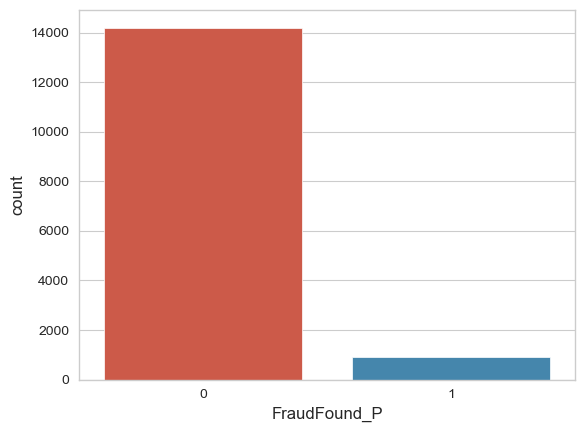

In [135]:
sns.countplot(x='FraudFound_P', data=df)
plt.show()

so the data is imbalance and we need to use some balancing tecniques  
first we try SMOTE balancing because it seems to be the best option in the tradeoff of bias and variance

In [136]:
from sklearn.model_selection import train_test_split

y = df['FraudFound_P']
X = df.drop('FraudFound_P', axis=1)

In [137]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scaling

In [138]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

# Modeling :

In [139]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [151]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("logistic regression accuracy :", accuracy)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(logreg, X_resampled, y_resampled, cv=cv)
print("Cross-validation scores:", scores)
mean_score = scores.mean()
print("Mean accuracy:", mean_score)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

logistic regression accuracy : 0.8149190710767066
Cross-validation scores: [0.80031668 0.80010558 0.80714411 0.8023931  0.80151329]
Mean accuracy: 0.8022945515861906
[[2333  542]
 [ 510 2299]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      2875
           1       0.81      0.82      0.81      2809

    accuracy                           0.81      5684
   macro avg       0.81      0.81      0.81      5684
weighted avg       0.81      0.81      0.81      5684



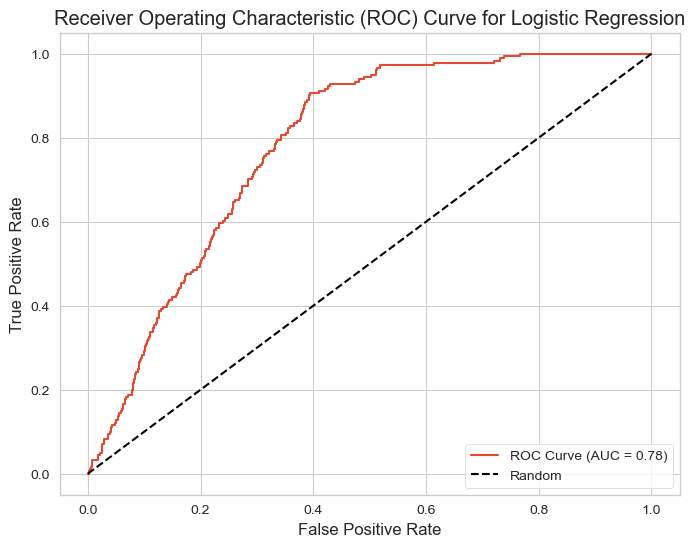

In [165]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [59]:
# from sklearn.svm import SVC
# svm = SVC(kernel='linear', cache_size=7000)
# svm.fit(X_train, y_train)
# y_pred = svm.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("SVM Acuuracy :", accuracy)
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_val_score(svm, X_resampled, y_resampled, cv=cv)
# print("Cross-validation scores:", scores)
# mean_score = scores.mean()
# print("Mean accuracy:", mean_score)

In [175]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Desicion Tree Accuracy:", accuracy)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(tree, X_resampled, y_resampled, cv=cv)
print("Cross-validation scores:", scores)
mean_score = scores.mean()
print("Mean accuracy:", mean_score)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Desicion Tree Accuracy: 0.9165562913907285
Cross-validation scores: [0.92153413 0.9264473  0.92433574 0.91624142 0.9139539 ]
Mean accuracy: 0.9205024974791168
[[2706  133]
 [ 119   62]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2839
           1       0.32      0.34      0.33       181

    accuracy                           0.92      3020
   macro avg       0.64      0.65      0.64      3020
weighted avg       0.92      0.92      0.92      3020



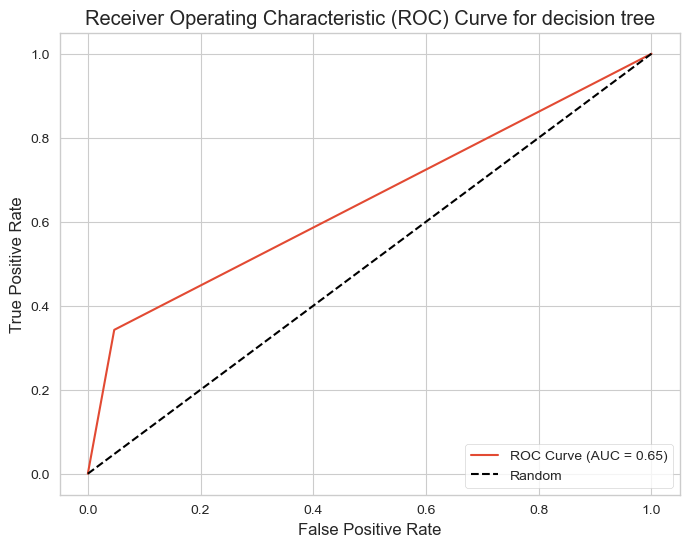

In [176]:
y_pred_prob = tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for decision tree')
plt.legend(loc='lower right')
plt.show()

In [174]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Accuracy:", accuracy)
scores = cross_val_score(rf, X_resampled, y_resampled, cv=cv)
print("Cross-validation scores:", scores)
mean_score = scores.mean()
print("Mean accuracy:", mean_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9407284768211921
Cross-validation scores: [0.95935961 0.95882456 0.96040824 0.95548126 0.95460144]
Mean accuracy: 0.9577350216573672
[[2839    0]
 [ 179    2]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2839
           1       1.00      0.01      0.02       181

    accuracy                           0.94      3020
   macro avg       0.97      0.51      0.50      3020
weighted avg       0.94      0.94      0.91      3020



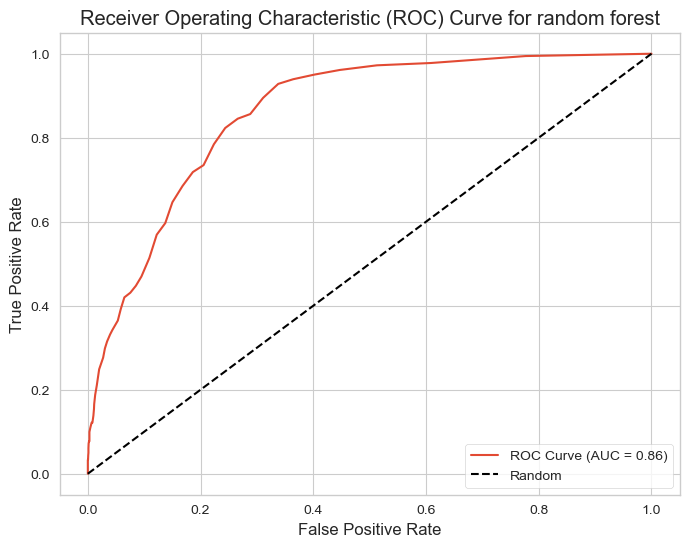

In [167]:
y_pred_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for random forest')
plt.legend(loc='lower right')
plt.show()

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)
scores = cross_val_score(knn, X_resampled, y_resampled, cv=cv)
print("Cross-validation scores:", scores)
mean_score = scores.mean()
print("Mean accuracy:", mean_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.9374172185430464
Cross-validation scores: [0.82125264 0.83283477 0.82086926 0.82298082 0.83054725]
Mean accuracy: 0.8256969469421437
[[2828   11]
 [ 178    3]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2839
           1       0.21      0.02      0.03       181

    accuracy                           0.94      3020
   macro avg       0.58      0.51      0.50      3020
weighted avg       0.90      0.94      0.91      3020



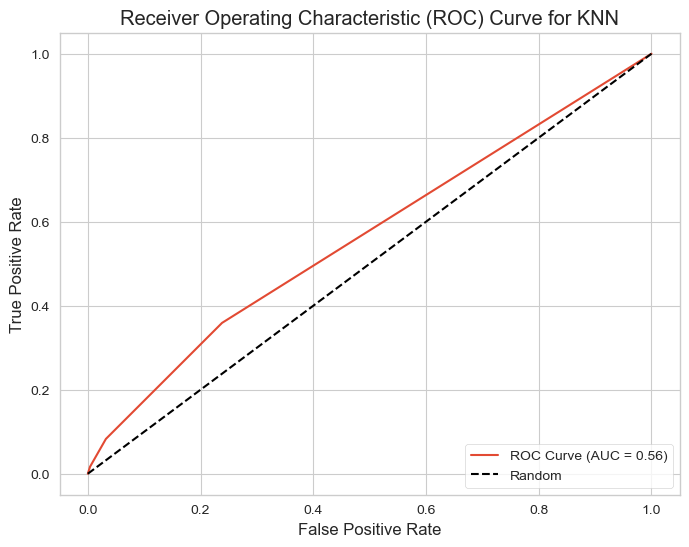

In [169]:
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc='lower right')
plt.show()

In [155]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)
scores = cross_val_score(nb, X_resampled, y_resampled, cv=cv)
print("Cross-validation scores:", scores)
mean_score = scores.mean()
print("Mean accuracy:", mean_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.9056291390728477
Cross-validation scores: [0.76724138 0.75910611 0.7754707  0.76244941 0.75998592]
Mean accuracy: 0.7648507041569836
[[2723  116]
 [ 169   12]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2839
           1       0.09      0.07      0.08       181

    accuracy                           0.91      3020
   macro avg       0.52      0.51      0.51      3020
weighted avg       0.89      0.91      0.90      3020



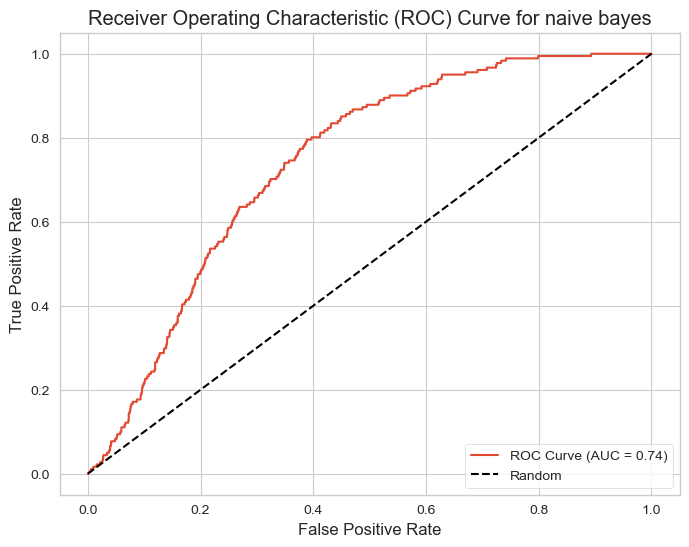

In [171]:
y_pred_prob = nb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for naive bayes')
plt.legend(loc='lower right')
plt.show()

# Over Sampling Method

In [156]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

In [157]:
logreg.fit(X_train_oversampled, y_train_oversampled)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("logistic regression accuracy :", accuracy)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(logreg, X_train_oversampled, y_train_oversampled, cv=cv)
print("Cross-validation scores:", scores)
mean_score = scores.mean()
print("Mean accuracy:", mean_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

logistic regression accuracy : 0.6857615894039735
Cross-validation scores: [0.72185576 0.73548813 0.72229551 0.74268749 0.73784913]
Mean accuracy: 0.73203520389699
[[1933  906]
 [  43  138]]
              precision    recall  f1-score   support

           0       0.98      0.68      0.80      2839
           1       0.13      0.76      0.23       181

    accuracy                           0.69      3020
   macro avg       0.56      0.72      0.51      3020
weighted avg       0.93      0.69      0.77      3020



In [158]:
tree.fit(X_train_oversampled, y_train_oversampled)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Desicion Tree Accuracy:", accuracy)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(tree, X_train_oversampled, y_train_oversampled, cv=cv)
print("Cross-validation scores:", scores)
mean_score = scores.mean()
print("Mean accuracy:", mean_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Desicion Tree Accuracy: 0.9175496688741722
Cross-validation scores: [0.97735268 0.97955145 0.98131047 0.97844733 0.97778755]
Mean accuracy: 0.9788898959929702
[[2725  114]
 [ 135   46]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2839
           1       0.29      0.25      0.27       181

    accuracy                           0.92      3020
   macro avg       0.62      0.61      0.61      3020
weighted avg       0.91      0.92      0.92      3020



In [159]:
rf.fit(X_train_oversampled, y_train_oversampled)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Accuracy:", accuracy)
scores = cross_val_score(rf, X_train_oversampled, y_train_oversampled, cv=cv)
print("Cross-validation scores:", scores)
mean_score = scores.mean()
print("Mean accuracy:", mean_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9427152317880795
Cross-validation scores: [0.99912049 0.99824099 0.99890062 0.9982406  0.99868045]
Mean accuracy: 0.998636628014373
[[2836    3]
 [ 170   11]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2839
           1       0.79      0.06      0.11       181

    accuracy                           0.94      3020
   macro avg       0.86      0.53      0.54      3020
weighted avg       0.93      0.94      0.92      3020



In [172]:
knn.fit(X_train_oversampled, y_train_oversampled)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)
scores = cross_val_score(knn, X_train_oversampled, y_train_oversampled, cv=cv)
print("Cross-validation scores:", scores)
mean_score = scores.mean()
print("Mean accuracy:", mean_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.8125827814569536
Cross-validation scores: [0.91248901 0.91600704 0.9173263  0.91400924 0.91466901]
Mean accuracy: 0.9149001177770183
[[2407  432]
 [ 134   47]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.89      2839
           1       0.10      0.26      0.14       181

    accuracy                           0.81      3020
   macro avg       0.52      0.55      0.52      3020
weighted avg       0.90      0.81      0.85      3020



In [173]:
nb.fit(X_train_oversampled, y_train_oversampled)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)
scores = cross_val_score(nb, X_train_oversampled, y_train_oversampled, cv=cv)
print("Cross-validation scores:", scores)
mean_score = scores.mean()
print("Mean accuracy:", mean_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.6738410596026491
Cross-validation scores: [0.70140721 0.69942832 0.70294635 0.69870244 0.70815923]
Mean accuracy: 0.7021287098358414
[[1903  936]
 [  49  132]]
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      2839
           1       0.12      0.73      0.21       181

    accuracy                           0.67      3020
   macro avg       0.55      0.70      0.50      3020
weighted avg       0.92      0.67      0.76      3020



# Under Sampling method

In [178]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

In [179]:
logreg.fit(X_train_undersampled, y_train_undersampled)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("logistic regression accuracy :", accuracy)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(logreg, X_train_undersampled, y_train_undersampled, cv=cv)
print("Cross-validation scores:", scores)
mean_score = scores.mean()
print("Mean accuracy:", mean_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

logistic regression accuracy : 0.6682119205298013
Cross-validation scores: [0.70877193 0.71578947 0.68309859 0.6971831  0.71478873]
Mean accuracy: 0.7039263652087966
[[1878  961]
 [  41  140]]
              precision    recall  f1-score   support

           0       0.98      0.66      0.79      2839
           1       0.13      0.77      0.22       181

    accuracy                           0.67      3020
   macro avg       0.55      0.72      0.50      3020
weighted avg       0.93      0.67      0.76      3020



In [181]:
tree.fit(X_train_undersampled, y_train_undersampled)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Desicion Tree Accuracy:", accuracy)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(tree, X_train_undersampled, y_train_undersampled, cv=cv)
print("Cross-validation scores:", scores)
mean_score = scores.mean()
print("Mean accuracy:", mean_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Desicion Tree Accuracy: 0.7745033112582781
Cross-validation scores: [0.72280702 0.78596491 0.70070423 0.75704225 0.74295775]
Mean accuracy: 0.7418952310353347
[[2207  632]
 [  49  132]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      2839
           1       0.17      0.73      0.28       181

    accuracy                           0.77      3020
   macro avg       0.58      0.75      0.57      3020
weighted avg       0.93      0.77      0.83      3020



In [182]:
rf.fit(X_train_undersampled, y_train_undersampled)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Accuracy:", accuracy)
scores = cross_val_score(rf, X_train_undersampled, y_train_undersampled, cv=cv)
print("Cross-validation scores:", scores)
mean_score = scores.mean()
print("Mean accuracy:", mean_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7254966887417219
Cross-validation scores: [0.80350877 0.7754386  0.78169014 0.79225352 0.80985915]
Mean accuracy: 0.7925500370644922
[[2030  809]
 [  20  161]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      2839
           1       0.17      0.89      0.28       181

    accuracy                           0.73      3020
   macro avg       0.58      0.80      0.56      3020
weighted avg       0.94      0.73      0.80      3020



In [183]:
knn.fit(X_train_undersampled, y_train_undersampled)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)
scores = cross_val_score(knn, X_train_undersampled, y_train_undersampled, cv=cv)
print("Cross-validation scores:", scores)
mean_score = scores.mean()
print("Mean accuracy:", mean_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.5350993377483444
Cross-validation scores: [0.50877193 0.54035088 0.47887324 0.48943662 0.51056338]
Mean accuracy: 0.5055992092908327
[[1524 1315]
 [  89   92]]
              precision    recall  f1-score   support

           0       0.94      0.54      0.68      2839
           1       0.07      0.51      0.12       181

    accuracy                           0.54      3020
   macro avg       0.51      0.52      0.40      3020
weighted avg       0.89      0.54      0.65      3020



In [184]:
nb.fit(X_train_undersampled, y_train_undersampled)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)
scores = cross_val_score(nb, X_train_undersampled, y_train_undersampled, cv=cv)
print("Cross-validation scores:", scores)
mean_score = scores.mean()
print("Mean accuracy:", mean_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.6751655629139073
Cross-validation scores: [0.68070175 0.69473684 0.65140845 0.68661972 0.67253521]
Mean accuracy: 0.6772003953545835
[[1915  924]
 [  57  124]]
              precision    recall  f1-score   support

           0       0.97      0.67      0.80      2839
           1       0.12      0.69      0.20       181

    accuracy                           0.68      3020
   macro avg       0.54      0.68      0.50      3020
weighted avg       0.92      0.68      0.76      3020

